# English Premier League(2020-21)
**Statistics of EPL 2020-21 season Players**<br><br>

Below you can see my analysis of the English Premier League (EPL) from season 2020-21.**<br> 

**Dataset details here:**
- Dataset Source: https://www.kaggle.com/rajatrc1705/english-premier-league202021<br><br>


### Context:


This dataset is a collection of basic but crucial stats of the English Premier League 2020-21 season. The dataset has all the players that played in the EPL and their standard stats such as Goals, Assists, xG (Expected Goals), xA (Expected Assists), Passes Attempted, Pass Accuracy and more!

### Content (dataset columns):
**Position:**	Each player has a certain position, in which he plays regularly. The position in this dataset are, FW - Forward, MF - Midfield, DF - Defensive, GK - Goalkeeper<br>
**Starts:**	The number of times the player was named in the starting 11 by the manager.<br>
**Mins:**	The number of minutes played by the player.<br>
**Goals:**	The number of Goals scored by the player.<br>
**Assists:**	The number of times the player has assisted other player in scoring the goal.<br>
**Passes_Attempted:**	The number of passes attempted by the player.<br>
**PercPassesCompleted:**	The number of passes that the player accurately passed to his teammate.<br>
**xG:**	Expected number of goals from the player in a match.<br>
**xA:**	Expected number of assists from the player in a match.<br>
**Yellow_Cards:**	The players get a yellow card from the referee for indiscipline, technical fouls, or other minor fouls.<br>
**Red Cards:**	The players get a red card for accumulating 2 yellow cards in a single game, or for a major foul.<br><br>

On the begining I determined basics what I would like to know (first goals). During the analysis I have checked some more data.<br>

### Objectives:

1. Number of yellow and red cards
1. Total number of cards within nationality
1. Number of cards per 1 player within nationality
1. Number of cards per 1 player within position
1. Amount of goals and assists
1. Scored goals - TOP 10 players
1. Assists - TOP 10 players
1. Canadian points - TOP 10 players
1. Goals by position on field
1. Assists by position on field
1. Amount of not scored goals - based on xG factor
1. Expected goal
1. Passes attempted - TOP 10 players
1. Accurate passes attempted 
1. The oldest players
1. The youngest players
1. Average age by position on field
1. Average age in EPL clubs
1. Amount of nationalities Premier League clubs

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Qustion1: Load the data and have a quick look at them - what can you notice?

In [2]:

df = pd.read_csv('./EPL_20_21/EPL_20_21.csv')
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [3]:
# lets display the total non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

As we can see we have a total of 18 columns numbered from 0 to 17, and we have 532 entries in total
We can also see that all the entries (in each column) are non null because they match the total entries - 532

In [4]:
# lets use the describe to get some summary statistics about our dataset
df.describe()
# the describe function only works on numeric columns eg ints and floats

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


In [5]:
# lets find if we have null values though just to be sure - verifications
df.isna().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

As we can see the data we were provided are clean and there are no errors.

### Question2: Make 2 new columns

1 for the minutes per match 

1 for the goals per match

In [6]:
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [7]:
# creating new columns 
# should be equal to the total number of minutes divided by the matches
df['MinsPerMatch'] = (df['Mins']/df['Matches']).astype(int)
df['GoalsPerMatch'] = (df['Goals']/df['Matches']).astype(float)
df.head(10)

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88,0.000000
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,84,0.111111
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,74,0.031250
5,César Azpilicueta,Chelsea,ESP,DF,30,26,24,2188,1,2,2015,87.5,0,0,0.03,0.11,5,1,84,0.038462
6,N'Golo Kanté,Chelsea,FRA,MF,29,30,24,2146,0,2,1504,86.6,0,0,0.04,0.05,7,0,71,0.000000
7,Jorginho,Chelsea,ITA,MF,28,28,23,2010,7,1,1739,89.5,7,9,0.31,0.09,2,0,71,0.250000
8,Thiago Silva,Chelsea,BRA,DF,35,23,23,1935,2,0,1871,93.5,0,0,0.05,0.02,5,1,84,0.086957
9,Kurt Zouma,Chelsea,FRA,DF,25,24,22,2029,5,0,1720,91.9,0,0,0.08,0.00,3,0,84,0.208333


### Question3: Calculate the total number of goals that were scored in the 20-21 EPL season

In [8]:
# we can calculate that from the goals column
total_goals = df['Goals'].sum()
print('Total goals in the 20-21 EPL season:  {}'.format(total_goals))

Total goals in the 20-21 EPL season:  986


### Question4: Calculate the total goals that were scored from penalties

In [9]:
total_penalty = df['Penalty_Goals'].sum()
print('Total goals from penalties in the 20-21 EPL season:  {}'.format(total_penalty))

Total goals from penalties in the 20-21 EPL season:  102


### Calculate5: the total penalties that were attempted

In [10]:
total_pen_attempted = df['Penalty_Attempted'].sum()
print('Total number of penalties attempted in the 20-21 EPL season:  {}'.format(total_pen_attempted))

Total number of penalties attempted in the 20-21 EPL season:  125


### Question6: Plot a pie chart for penalties missed vs scored 

what percentage of the penalties resulted in a goal and what percentage of the penatlies missed?

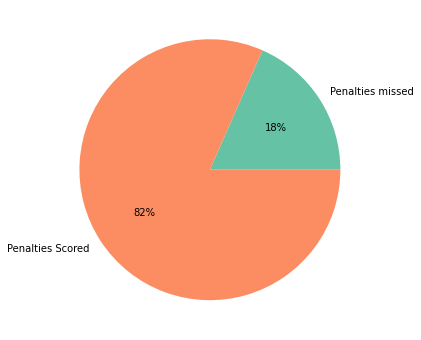

In [11]:
plt.figure(figsize=(13,6))
plt_not_scored = df["Penalty_Attempted"].sum() - total_penalty
data = [plt_not_scored,total_penalty]
labels = ['Penalties missed', 'Penalties Scored']
color = sns.color_palette('Set2')
# autopct enables you to display the percentage value using python string formating
plt.pie(data, labels=labels, colors=color, autopct='%.0f%%')
plt.show()

We can see that 82% of penalties were scored while 18% were missed

### Question7: Find the total unique positions for which each of the players play for

In [12]:
# this will tell us how many unique positions there are.
df['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [13]:
# if we want to see how many and not the names - just a number
df['Position'].nunique()

10

### Question8: Find how many FW position players we have in this dataset

In [14]:
df[df['Position'] == 'FW'] 

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
16,Tammy Abraham,Chelsea,ENG,FW,22,22,12,1040,6,1,218,68.3,0,0,0.56,0.07,0,0,47,0.272727
19,Olivier Giroud,Chelsea,FRA,FW,33,17,8,748,4,0,217,74.2,0,0,0.58,0.09,1,0,44,0.235294
23,Ruben Loftus-Cheek,Chelsea,ENG,FW,24,1,1,60,0,0,16,68.8,0,0,0.00,0.00,0,0,60,0.000000
30,Raheem Sterling,Manchester City,ENG,FW,25,31,28,2536,10,7,1127,85.4,0,1,0.43,0.17,4,0,81,0.322581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Oliver Burke,Sheffield United,SCO,FW,23,25,14,1269,1,1,262,70.6,0,0,0.17,0.13,2,0,50,0.040000
518,Oliver McBurnie,Sheffield United,SCO,FW,24,23,12,1324,1,0,426,62.9,0,0,0.21,0.07,2,0,57,0.043478
519,Rhian Brewster,Sheffield United,ENG,FW,20,27,12,1128,0,0,225,69.3,0,0,0.14,0.13,1,0,41,0.000000
523,Billy Sharp,Sheffield United,ENG,FW,34,16,7,735,3,0,123,69.9,2,2,0.33,0.07,1,0,45,0.187500


81 rows therefore 81 players play in the EPL in the FW position

In [25]:
(df['Position'] == 'FW').value_counts()

False    451
True      81
Name: Position, dtype: int64

### Question9: Find the players from different nations 

what are the total number of nations players come from

In [16]:
np.size((df['Nationality'].unique()))

59

### Question10: From which nation come most players?

In [17]:
nationality = df.groupby('Nationality').size().sort_values(ascending=False)
nationality

Nationality
ENG    192
FRA     31
BRA     27
ESP     26
IRL     21
POR     21
SCO     20
NED     16
WAL     12
BEL     11
GER      9
ARG      8
CIV      8
NGA      7
DEN      6
SUI      6
USA      6
SEN      5
EGY      5
COL      5
SWE      5
TUR      5
GHA      5
POL      5
NIR      5
ITA      5
SRB      4
AUS      4
NOR      3
ALG      3
JAM      3
CZE      3
ISL      3
RSA      2
COD      2
CRO      2
MAR      2
GAB      2
SVK      2
PAR      2
CMR      2
UKR      2
JPN      2
MLI      2
CAN      1
URU      1
BFA      1
AUT      1
BIH      1
KOR      1
SKN      1
GRE      1
NZL      1
GUI      1
IRN      1
MTN      1
MKD      1
MEX      1
ZIM      1
dtype: int64

In [18]:
nationality.head()

Nationality
ENG    192
FRA     31
BRA     27
ESP     26
IRL     21
dtype: int64

192 players are from England

### Question11: Plot the data regarding their nationality

<AxesSubplot:xlabel='Nationality'>

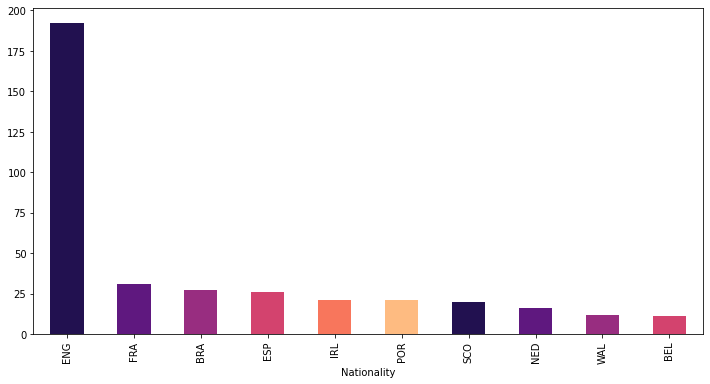

In [19]:
nationality.head(10).plot(kind='bar', figsize=(12,6), color = sns.color_palette('magma'))

So as we can see most of the players are from England (192) then France (31) and then Brazil (27).

### Question12: Find the clubs with the most players in their squad and plot the data

In [26]:
df['Club'].value_counts()

West Bromwich Albion       30
Manchester United          29
Arsenal                    29
Southampton                29
Everton                    29
Liverpool FC               28
Fulham                     28
Chelsea                    27
Newcastle United           27
Brighton                   27
Wolverhampton Wanderers    27
Sheffield United           27
Leicester City             27
Burnley                    25
Manchester City            24
Crystal Palace             24
Tottenham Hotspur          24
West Ham United            24
Aston Villa                24
Leeds United               23
Name: Club, dtype: int64

<AxesSubplot:>

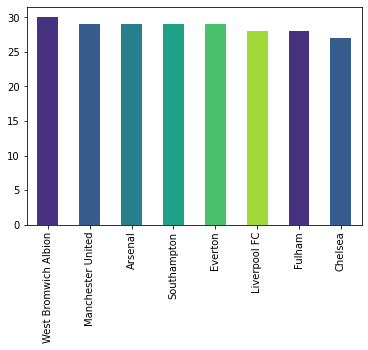

In [20]:
df['Club'].value_counts().nlargest(8).plot(kind='bar', color=sns.color_palette('viridis'))

We have West Browmwich Albion which had 30 players in the sport then Manchester United together with Arsenal Southampton and Everton - 29.

### Question13: Find the clubs with the least amount of players in their squad

In [31]:
df['Club'].value_counts(ascending=True).head(8)

Leeds United         23
Manchester City      24
Crystal Palace       24
West Ham United      24
Tottenham Hotspur    24
Aston Villa          24
Burnley              25
Chelsea              27
Name: Club, dtype: int64

<AxesSubplot:>

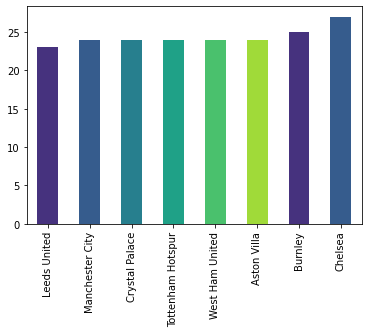

In [21]:
df['Club'].value_counts().nsmallest(8).plot(kind='bar', color=sns.color_palette('viridis'))

As we can see, Leeds United had 23 players followed by MC, CP, Tottenham and WHU with 24 players.

### Question14: Can you split the players based on age group categories and plot the graph

under 20, 21-25, 26-30, 31 and above

In [22]:
under20 = df[df['Age'] <= 20]
age21_25 = df[(df['Age'] > 20) & (df['Age'] <= 25)]
age26_30 = df[(df['Age'] > 25) & (df['Age'] <= 30)]
above30 = df[df['Age'] > 30]
 

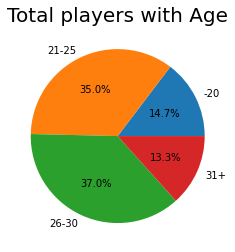

In [33]:
x = np.array([under20['Name'].count(), age21_25['Name'].count(), age26_30['Name'].count(), above30['Name'].count()])
mylabels = ['-20', '21-25', '26-30', '31+']
plt.title('Total players with Age', fontsize = 20)
plt.pie(x, labels = mylabels, autopct="%.1f%%")
plt.show()

As we can see most players in the EPL are between 26 and 30 years old (37%)

Close to players between 21-25 (35%)

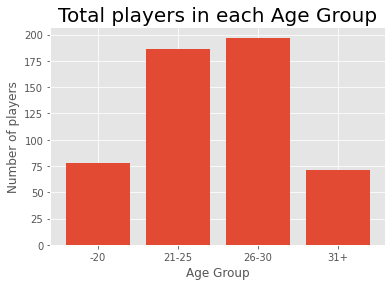

In [40]:
x = np.array([under20['Name'].count(), age21_25['Name'].count(), age26_30['Name'].count(), above30['Name'].count()])
mylabels = ['-20', '21-25', '26-30', '31+']
plt.style.use('ggplot')
plt.title('Total players in each Age Group', fontsize = 20)
plt.bar(x=mylabels, height=x)
plt.xlabel('Age Group')
plt.ylabel('Number of players')
plt.show()

### Question15: Find the number of players below 20 in each club and plot the data

In [41]:
players_under_20 = df[df['Age'] < 20]
players_under_20['Club'].value_counts()

Manchester United          7
Wolverhampton Wanderers    5
Sheffield United           4
Southampton                4
Aston Villa                3
Liverpool FC               3
Leicester City             3
Brighton                   2
Chelsea                    2
Manchester City            2
Arsenal                    2
Everton                    2
Newcastle United           1
Leeds United               1
Tottenham Hotspur          1
Burnley                    1
Fulham                     1
Name: Club, dtype: int64

<AxesSubplot:>

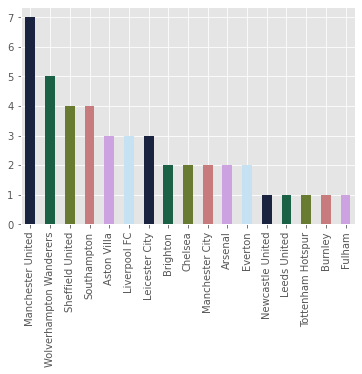

In [45]:
players_under_20['Club'].value_counts().plot(kind='bar', color=sns.color_palette('cubehelix'))

We can see that there 7 players in MU who are below 20 yearls old follow by WW that has 5 players and etc.

### Question16: Find all the players in MU who are below 20 years old

In [46]:
players_under_20[players_under_20['Club'] == 'Manchester United']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
61,Mason Greenwood,Manchester United,ENG,FW,18,31,21,1822,7,2,732,83.1,0,0,0.37,0.09,2,0,58,0.225806
72,Brandon Williams,Manchester United,ENG,DF,19,4,2,188,0,0,140,85.7,0,0,0.05,0.01,0,0,47,0.000000
73,Amad Diallo,Manchester United,CIV,FW,18,3,2,166,0,1,64,84.4,0,0,0.02,0.26,0,0,55,0.000000
74,Anthony Elanga,Manchester United,SWE,FW,18,2,2,155,1,0,53,81.1,0,0,0.16,0.02,0,0,77,0.500000
76,Shola Shoretire,Manchester United,ENG,FW,16,2,0,11,0,0,8,75.0,0,0,0.00,0.00,0,0,5,0.000000
78,Hannibal Mejbri,Manchester United,FRA,MF,17,1,0,9,0,0,3,100.0,0,0,0.00,0.00,0,0,9,0.000000
79,William Thomas Fish,Manchester United,ENG,DF,17,1,0,1,0,0,1,0.0,0,0,0.00,0.00,0,0,1,0.000000


### Question17: Find all the players in Chelsea who are below 20 years old

In [47]:
players_under_20[players_under_20['Club'] == 'Chelsea']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
18,Callum Hudson-Odoi,Chelsea,ENG,"FW,DF",19,23,10,1059,2,3,659,82.2,0,0,0.12,0.26,0,0,46,0.086957
21,Billy Gilmour,Chelsea,SCO,MF,19,5,3,261,0,0,215,89.3,0,0,0.01,0.04,0,0,52,0.000000


### Question 18: Find the average age of players in each club and plot the data

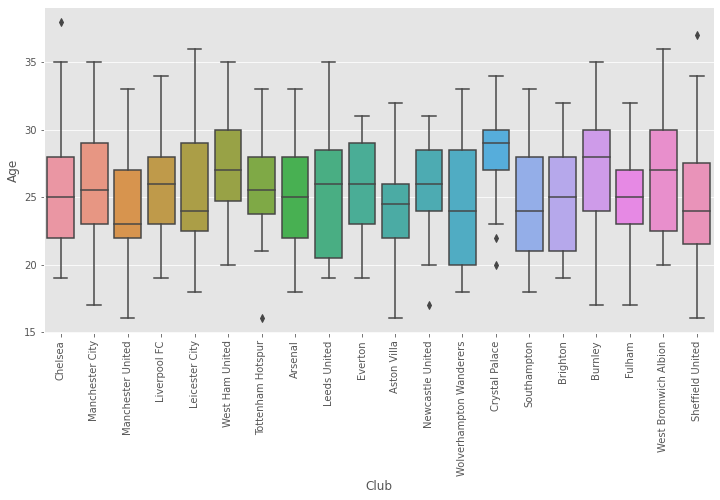

In [48]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Club', y='Age', data = df)
plt.xticks(rotation=90)
plt.show()

The dots are the outliers. 

The line inside the box is the median of each club

We can see that Crystal Palace has the highest average age of players, but also 2 outliers below Q1.

lets verify the above statistics we have aquired

In [54]:
# finding the size of each club
num_player = df.groupby('Club').size()
num_player

Club
Arsenal                    29
Aston Villa                24
Brighton                   27
Burnley                    25
Chelsea                    27
Crystal Palace             24
Everton                    29
Fulham                     28
Leeds United               23
Leicester City             27
Liverpool FC               28
Manchester City            24
Manchester United          29
Newcastle United           27
Sheffield United           27
Southampton                29
Tottenham Hotspur          24
West Bromwich Albion       30
West Ham United            24
Wolverhampton Wanderers    27
dtype: int64

In [56]:
# finding the total age of all players in each club
df.groupby('Club')['Age'].sum()

Club
Arsenal                    724
Aston Villa                583
Brighton                   663
Burnley                    676
Chelsea                    691
Crystal Palace             680
Everton                    737
Fulham                     701
Leeds United               583
Leicester City             691
Liverpool FC               716
Manchester City            617
Manchester United          692
Newcastle United           704
Sheffield United           670
Southampton                700
Tottenham Hotspur          615
West Bromwich Albion       803
West Ham United            660
Wolverhampton Wanderers    660
Name: Age, dtype: int64

In [57]:
# dividing the total age of all players in each club by the number of players in each club
data = (df.groupby('Club')['Age'].sum())/ num_player
data

Club
Arsenal                    24.965517
Aston Villa                24.291667
Brighton                   24.555556
Burnley                    27.040000
Chelsea                    25.592593
Crystal Palace             28.333333
Everton                    25.413793
Fulham                     25.035714
Leeds United               25.347826
Leicester City             25.592593
Liverpool FC               25.571429
Manchester City            25.708333
Manchester United          23.862069
Newcastle United           26.074074
Sheffield United           24.814815
Southampton                24.137931
Tottenham Hotspur          25.625000
West Bromwich Albion       26.766667
West Ham United            27.500000
Wolverhampton Wanderers    24.444444
dtype: float64

In [59]:
# lets sort them 
data.sort_values(ascending=False)

Club
Crystal Palace             28.333333
West Ham United            27.500000
Burnley                    27.040000
West Bromwich Albion       26.766667
Newcastle United           26.074074
Manchester City            25.708333
Tottenham Hotspur          25.625000
Chelsea                    25.592593
Leicester City             25.592593
Liverpool FC               25.571429
Everton                    25.413793
Leeds United               25.347826
Fulham                     25.035714
Arsenal                    24.965517
Sheffield United           24.814815
Brighton                   24.555556
Wolverhampton Wanderers    24.444444
Aston Villa                24.291667
Southampton                24.137931
Manchester United          23.862069
dtype: float64

As we can see we are correct!

### Question19: Find the total assists from each club and plot the data

In [61]:
assists_per_club = pd.DataFrame(df.groupby('Club',as_index=False)['Assists'].sum())
assists_per_club


,Club,Assists
0,Arsenal,38
1,Aston Villa,38
2,Brighton,24
3,Burnley,20
4,Chelsea,38
5,Crystal Palace,29
6,Everton,32
7,Fulham,18
8,Leeds United,45
9,Leicester City,45


Text(0.5, 1.0, 'Plot of Clubs vs Total Assists')

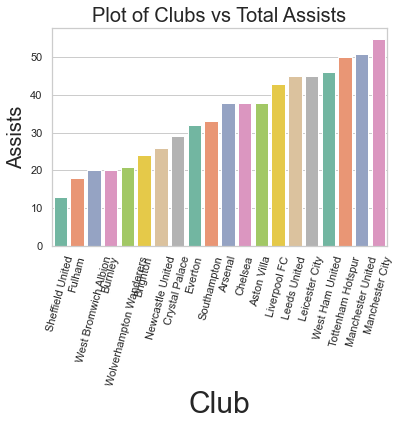

In [62]:
sns.set_theme(style='whitegrid', color_codes=True)
ax = sns.barplot(x='Club',y='Assists',data=assists_per_club.sort_values(by='Assists'),palette='Set2')
ax.set_xlabel('Club',fontsize=30)
ax.set_ylabel('Assists',fontsize=20)
plt.xticks(rotation=75)
plt.rcParams['figure.figsize'] = (20,8)
plt.title('Plot of Clubs vs Total Assists', fontsize=20)

as we can see MC had the highest number of assists, over 50

### Question20: Find the top 10 assists 

In [65]:
top_10_assists = df[['Name','Club','Assists','Matches']].nlargest(10, columns='Assists')
top_10_assists

,Name,Club,Assists,Matches
162,Harry Kane,Tottenham Hotspur,14,35
34,Kevin De Bruyne,Manchester City,12,25
51,Bruno Fernandes,Manchester United,12,37
161,Son Heung-min,Tottenham Hotspur,10,37
273,Jack Grealish,Aston Villa,10,26
54,Marcus Rashford,Manchester United,9,37
110,Jamie Vardy,Leicester City,9,34
220,Raphael Dias Belloli,Leeds United,9,30
2,Timo Werner,Chelsea,8,35
136,Aaron Cresswell,West Ham United,8,36


Harry Kane from TH had 14 assists in 35 matches 

Kevin De Bruyne from MC had 12 assists in 25 matches 

### Question21: Find the total goals from each club

In [66]:
goals_by_clubs = pd.DataFrame(df.groupby('Club',as_index=False)['Goals'].sum())
goals_by_clubs

,Club,Goals
0,Arsenal,53
1,Aston Villa,52
2,Brighton,39
3,Burnley,32
4,Chelsea,56
5,Crystal Palace,39
6,Everton,45
7,Fulham,26
8,Leeds United,60
9,Leicester City,64


Text(0.5, 1.0, 'Plot of Clubs vs Total Goals')

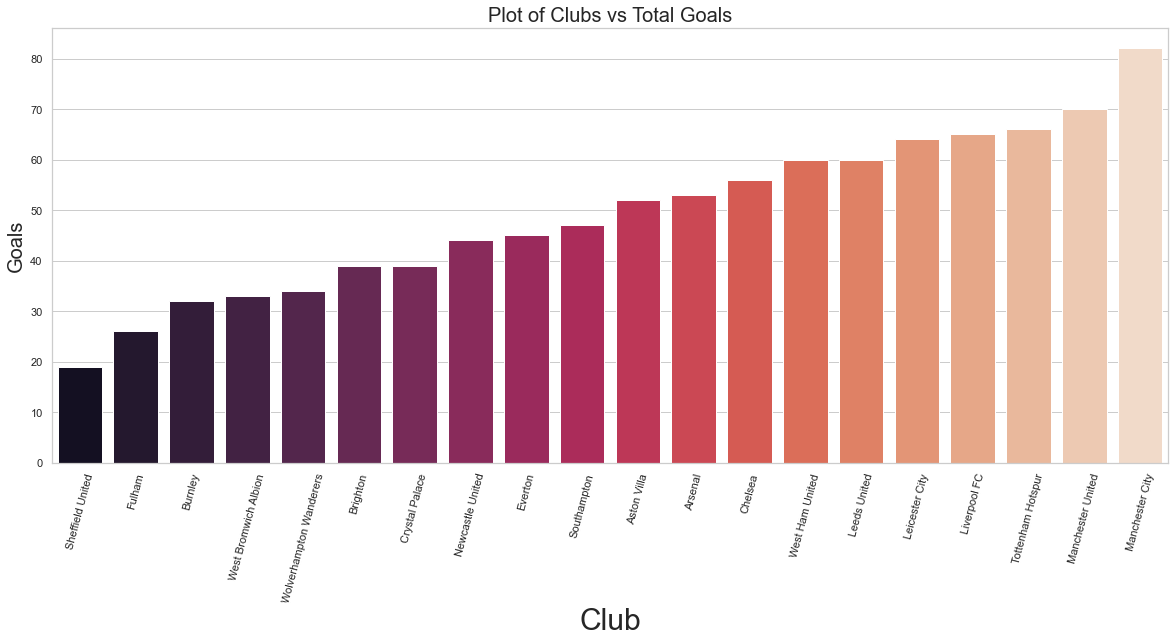

In [68]:
sns.set_theme(style='whitegrid',color_codes=True)
ax = sns.barplot(x='Club',y='Goals',data=goals_by_clubs.sort_values(by='Goals'),palette='rocket')
ax.set_xlabel('Club',fontsize=30)
ax.set_ylabel('Goals',fontsize=20)
plt.xticks(rotation=75)
plt.rcParams['figure.figsize'] = (20,8)
plt.title('Plot of Clubs vs Total Goals', fontsize=20)

As we can see we have MC with more than 80 goals scored followed by MU with about 70 goals and then TH with more than 65 goals.

### Question22: Find the most goals scored by players

In [69]:
top_10_goals = df[['Name', 'Club', 'Goals','Matches']].nlargest(n=10,columns='Goals')
top_10_goals

,Name,Club,Goals,Matches
162,Harry Kane,Tottenham Hotspur,23,35
81,Mohamed Salah,Liverpool FC,22,37
51,Bruno Fernandes,Manchester United,18,37
161,Son Heung-min,Tottenham Hotspur,17,37
214,Patrick Bamford,Leeds United,17,38
237,Dominic Calvert-Lewin,Everton,16,33
110,Jamie Vardy,Leicester City,15,34
267,Ollie Watkins,Aston Villa,14,37
33,İlkay Gündoğan,Manchester City,13,28
191,Alexandre Lacazette,Arsenal,13,31


We can see we have Harry Kane in the first place from TH with 23 goals in the 35 matches he played.

He had the most assists as well as we found before.

He is a very good player and probably that's why he is the current captain of England football team.

### Question23: Find out the top 10 scorers per match

This question is different from the above question.

We are trying to find the most efficient player lets say - The player with the best ratio of total number of goals per matches 

In [71]:
top_10_goals_per_match = df[['Name','GoalsPerMatch','Matches', 'Goals']].nlargest(n=10,columns='GoalsPerMatch')
top_10_goals_per_match

,Name,GoalsPerMatch,Matches,Goals
162,Harry Kane,0.657143,35,23
81,Mohamed Salah,0.594595,37,22
307,Joe Willock,0.571429,14,8
145,Jesse Lingard,0.562500,16,9
175,Gareth Bale,0.550000,20,11
74,Anthony Elanga,0.500000,2,1
51,Bruno Fernandes,0.486486,37,18
237,Dominic Calvert-Lewin,0.484848,33,16
120,Kelechi Iheanacho,0.480000,25,12
92,Diogo Jota,0.473684,19,9


### Question23: Create a pie chart and display goals with assist and without assist

In [ ]:
plt.figure(figsize=(14,7))

### Question24:

In [73]:
df_yellow = df.sort_values(by='Yellow_Cards', ascending= False)[:10]
df_yellow

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
266,John McGinn,Aston Villa,SCO,MF,25,37,37,3330,3,5,1398,77.3,0,0,0.06,0.08,12,0,90,0.081081
53,Harry Maguire,Manchester United,ENG,DF,27,34,34,3047,2,1,2139,89.0,0,0,0.06,0.01,11,0,89,0.058824
480,Conor Gallagher,West Bromwich Albion,ENG,MF,20,30,28,2531,2,2,954,77.8,0,0,0.06,0.06,11,0,84,0.066667
218,Kalvin Phillips,Leeds United,ENG,MF,24,29,28,2428,1,2,1462,82.8,0,0,0.01,0.14,10,0,83,0.034483
270,Douglas Luiz,Aston Villa,BRA,MF,22,33,32,2781,0,2,1431,84.8,0,0,0.05,0.05,10,1,84,0.000000
159,Pierre Højbjerg,Tottenham Hotspur,DEN,MF,24,38,38,3420,2,4,2687,88.9,0,0,0.03,0.05,9,0,90,0.052632
242,Mason Holgate,Everton,ENG,DF,23,28,26,2287,1,0,1200,78.8,0,0,0.03,0.03,9,0,81,0.035714
514,John Lundstram,Sheffield United,ENG,MF,26,28,23,2032,0,2,1041,81.0,0,1,0.09,0.05,8,1,72,0.000000
346,Luka Milivojević,Crystal Palace,SRB,MF,29,31,27,2359,1,1,1269,81.1,1,2,0.09,0.05,8,1,76,0.032258
318,Rúben Neves,Wolverhampton Wanderers,POR,MF,23,36,31,2675,5,1,1937,84.3,3,3,0.17,0.07,8,0,74,0.138889
